# Проверка статистических гипотез

In [7]:
import numpy as np
import pandas as pd
import itertools

import matplotlib.pyplot as plt
import scipy.stats

from statsmodels.stats.weightstats import *
from statsmodels.stats.descriptivestats import sign_test
from statsmodels.stats.proportion import proportion_confint, samplesize_confint_proportion

from sklearn import model_selection, datasets, linear_model, metrics

%matplotlib inline

## Treatment effects of methylphenidate

В рамках исследования эффективности препарата метилфенидат 24 пациента с синдромом дефицита внимания и гиперактивности в течение недели принимали либо метилфенидат, либо плацебо. В конце недели каждый пациент проходили тест на способность к подавлению импульсивных поведенческих реакций. На втором этапе плацебо и препарат менялись, и после недельного курса каждый испытуемые проходили второй тест.

Требуется оценить эффект применения препарата.

In [27]:
data = pd.read_csv('ADHD.txt', sep = ' ', header = 0)
data.columns = ['Placebo', 'Methylphenidate']

In [28]:
data.head()

,Placebo,Methylphenidate
0,57,62
1,27,49
2,32,30
3,31,34
4,34,38


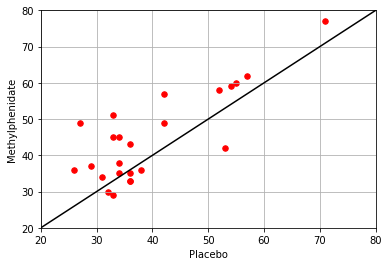

In [31]:
data.plot.scatter('Placebo', 'Methylphenidate', c = 'r', s = 30)
plt.grid()
plt.plot(range(100), c = 'black')
plt.xlim((20, 80))
plt.ylim((20, 80))
plt.show()

## Одновыборочный критерий Стьюдента

Исходя из того, что способность к подавлению испульсивных поведенческих реакций измеряется по шкале [0, 100], можно предположить, что при хорошей калибровке теста средняя способоность к подавлению реакций в популяции составляет 50. Тогда для того, чтобы проверить гипотезу о том, что пациенты в выборке действительно в среднем хуже справляются с подавлением импульсивных реакций (нуждаются в лечении), давайте проверим, что их способность к подавлению реакций отличается от средней (не равна 50). 

$H_0\colon$ среднее значение способности к подавлению испульсивных поведенческих реакций равно 50.

$H_1\colon$ не равно.

In [40]:
# проверьте гипотезу H_0 с помощью stats.ttest_1samp

In [35]:
print("95%% confidence interval: [%f, %f]" % zconfint(data.Placebo))

95% confidence interval: [35.223273, 44.276727]


## Двухвыборочный критерий Стьюдента (независимые выборки)

Для того, чтобы использовать двухвыборочный критерий Стьюдента, убедимся, что распределения в выборках существенно не отличаются от нормальных.

In [46]:
np.random.normal(1000)

998.1647992294752

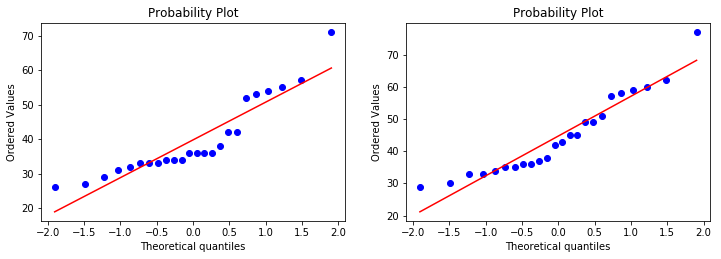

In [42]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
stats.probplot(data.Placebo, dist="norm", plot=plt)
plt.subplot(2,2,2)
stats.probplot(data.Methylphenidate, dist="norm", plot=plt)
plt.show()

Критерий Шапиро-Уилка:

 $H_0\colon$ способности к подавлению импульсивных реакций распредлены нормально
 
 $H_1\colon$ не нормально.

In [49]:
print("Placebo, Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(data.Placebo))

Placebo, Shapiro-Wilk normality test, W-statistic: 0.857487, p-value: 0.003020


In [50]:
print("Methylphenidate, Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(data.Methylphenidate))

Methylphenidate, Shapiro-Wilk normality test, W-statistic: 0.916445, p-value: 0.048768


С помощью критерия Стьюдента проверим гипотезу о развенстве средних двух выборок.

Критерий Стьюдента:

$H_0\colon$ средние значения способности к подавлению испульсивных поведенческих реакций одинаковы для пациентов, принимавших препарат, и для пациентов, принимавших плацебо.

$H_0\colon$ не одинаковы.

In [52]:
#используйте scipy.stats.ttest_ind с equal_var = False

## Двухвыборочный критерий Стьюдента (зависмые выборки)

Для того, чтобы использовать критерй Стьюдента для связанных выборок, давайте проверим, что распределение попарных разностей существенно не отличается от нормального.

In [53]:
# проверьте это

Критерий Стьюдента:

$H_0\colon$ средние значения способности к подавлению испульсивных поведенческих реакций одинаковы для пациентов, принимавших препарат, и для пациентов, принимавших плацебо.

$H_1\colon$ не одинаковы.

In [58]:
# если всё ок, примените stats.ttest_rel. Отвергаем или принимаем H0?

In [54]:
print("95%% confidence interval: [%f, %f]" % DescrStatsW(data.Methylphenidate - data.Placebo).tconfint_mean())

95% confidence interval: [1.775236, 8.141431]


# Непараметрические критерии

### Для одной выборки
  
  
  Критерий | Одновыборочный | Двухвыборочный | Двухвыборочный (связанные выборки)  
  ------------- | -------------|
  **Знаков**  | $\times$ | | $\times$ 
  **Ранговый** | $\times$  | $\times$ | $\times$  
  **Перестановочный** | $\times$  | $\times$ | $\times$ 

## Mirrors as potential environmental enrichment for individually housed laboratory mice

(Sherwin, 2004): 16 лабораторных мышей были помещены в двухкомнатные клетки, в одной из комнат висело зеркало. С целью установить, есть ли у мышей какие-то предпочтения насчет зеркал, измерялась доля времени, которое каждая мышь проводила в каждой из своих двух клеток.

In [10]:
import numpy as np
import pandas as pd
import itertools

from scipy import stats
from statsmodels.stats.descriptivestats import sign_test
from statsmodels.stats.weightstats import zconfint

In [11]:
mouses_data = pd.read_csv('mirror_mice.txt', header = None)
mouses_data.columns = ['proportion_of_time']

In [12]:
mouses_data

,proportion_of_time
0,0.348471
1,0.640620
2,0.549818
3,0.537454
4,0.400444
5,0.426292
6,0.417156
7,0.477977
8,0.450657
9,0.476602


In [65]:
mouses_data.describe()

,proportion_of_time
count,16.000000
mean,0.475289
std,0.066065
min,0.348471
25%,0.444566
50%,0.477289
75%,0.488859
max,0.640620


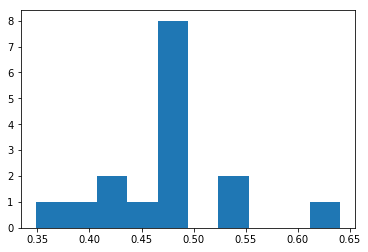

In [66]:
plt.hist(mouses_data.proportion_of_time)
plt.show()

## Одновыборочные критерии

### Критерий знаков

$H_0\colon$ медиана доли времени, проведенного в клетке с зеркалом, равна 0.5

$H_1\colon$ медиана доли времени, проведенного в клетке с зеркалом, не равна 0.5

In [113]:
# примените sign_test и выведите p-value

### Критерий знаковых рангов Вилкоксона

In [69]:
# примените stats.wilcoxon

### Перестановочный критерий

$H_0\colon$ среднее равно 0.5

$H_1\colon$ среднее не равно 0.5

In [2]:
# напишите подсчёт статистики перестановочного критерия

def permutation_t_stat_1sample(sample, mean):
    #
    return t_stat

In [3]:
# чему равна статистика для данных
permutation_t_stat_1sample(mouses_data.proportion_of_time, 0.5)

NameError: name 'mouses_data' is not defined

In [8]:
# теперь напишем функцию подсчёта распределения для перестановочного теста
def permutation_zero_distr_1sample(sample, mean, max_permutations = None):
    centered_sample = [x - mean for x in sample]
    if max_permutations:
        signs_array = set([tuple(x) for x in 2 * np.random.randint(2, size = (max_permutations, 
                                                                              len(sample))) - 1 ])
    else:
        signs_array =  itertools.product([-1, 1], repeat = len(sample))
    distr = [sum(centered_sample * np.array(signs)) for signs in signs_array]
    return distr

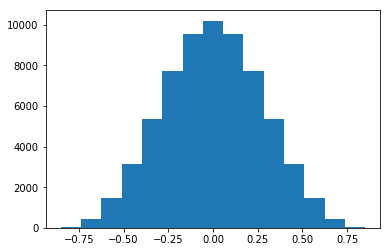

In [13]:
plt.hist(permutation_zero_distr_1sample(mouses_data.proportion_of_time, 0.5), bins = 15)
plt.show()

In [14]:
def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_1sample(sample, mean)
    
    zero_distr = permutation_zero_distr_1sample(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [31]:
# проверим гипотезу


## Двухвыборочные критерии для связных выборок

## Терапия при анорексии

В исследовании оценивается эффективность поведенческой терапии для лечения анорексии. Для 50 пациентов известен вес до начала терапии и по её окончании. Была ли терапия эффективной?

In [16]:
import numpy as np
import pandas as pd
import itertools

from scipy import stats
from statsmodels.stats.descriptivestats import sign_test
from statsmodels.stats.weightstats import zconfint

### Загрузка данных

In [18]:
weight_data = pd.read_csv('weight.txt', sep = '\t', header = 0)

In [19]:
weight_data.head()

,Before,After
0,80.5,82.2
1,84.9,85.6
2,81.5,81.4
3,82.6,81.9
4,79.9,76.4


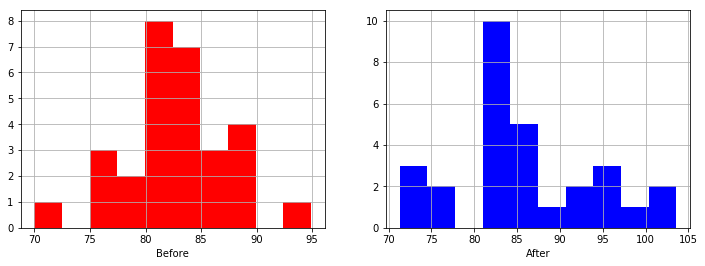

In [22]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.grid()
plt.hist(weight_data.Before, color = 'r')
plt.xlabel('Before')

plt.subplot(1,2,2)
plt.grid()
plt.hist(weight_data.After, color = 'b')
plt.xlabel('After')

plt.show()

In [23]:
weight_data.describe()

,Before,After
count,29.000000,29.000000
mean,82.689655,85.696552
std,4.845495,8.351924
min,70.000000,71.300000
25%,80.400000,81.900000
50%,82.600000,83.900000
75%,85.000000,90.900000
max,94.900000,103.600000


$H_0\colon$ медианы веса до и после терапии совпадает

$H_1\colon$ медианы веса до и после тепрапии отличаются

In [25]:
print('95%% confidence interval for mean weight before therapy: [%f, %f]' % zconfint(weight_data.Before))

95% confidence interval for mean weight before therapy: [80.926107, 84.453203]


In [26]:
print('95%% confidence interval for mean weight after therapy: [%f, %f]' % zconfint(weight_data.After))

95% confidence interval for mean weight after therapy: [82.656817, 88.736286]


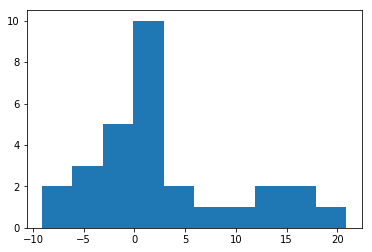

In [28]:
plt.hist(weight_data.After - weight_data.Before)
plt.show()

### Критерий знаков

$H_0\colon P\left(X_1>X_2\right)=\frac1{2},$

$H_1\colon P\left(X_1>X_2\right)\neq\frac1{2}$

In [29]:
# примените sign test к разницам

### Критерий знаковых рангов Уилкоксона

$H_0\colon med\left(X_1-X_2\right)=0,$

$H_1\colon med\left(X_1-X_2\right)\neq0$

In [30]:
# примените stats.wilcoxon

### Перестановочный критерий

$H_0\colon \mathbb{E}(X_1 - X_2) = 0$

$H_1\colon \mathbb{E}(X_1 - X_2) \neq 0$

In [ ]:
print("p-value: %f" % permutation_test(weight_data.After - weight_data.Before, 0., 
                               max_permutations = 1000))

## Недвижимость в Сиэттле

Имеются данные о продажной стоимости недвижимости в Сиэтле для 50 сделок в 2001 году и 50 в 2002. Изменились ли в среднем цены?

In [33]:
seattle_data = pd.read_csv('seattle.txt', sep = '\t', header = 0)

In [34]:
seattle_data.shape

(100, 2)

In [35]:
seattle_data.head()

,Price,Year
0,142.0,2002
1,232.0,2002
2,132.5,2002
3,200.0,2002
4,362.0,2002


In [36]:
price2001 = seattle_data[seattle_data['Year']  == 2001].Price
price2002 = seattle_data[seattle_data['Year']  == 2002].Price

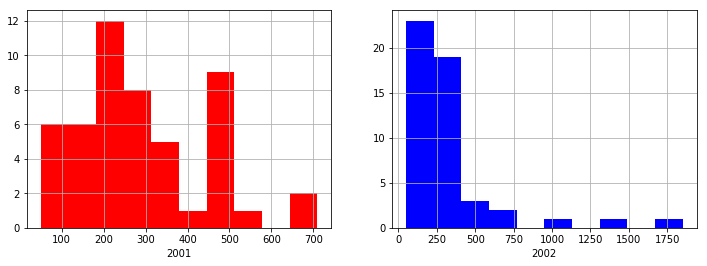

In [38]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.grid()
plt.hist(price2001, color = 'r')
plt.xlabel('2001')

plt.subplot(1,2,2)
plt.grid()
plt.hist(price2002, color = 'b')
plt.xlabel('2002')

plt.show()

In [39]:
print('95%% confidence interval for the mean: [%f, %f]' % zconfint(price2001))

95% confidence interval for the mean: [245.193581, 332.659499]


In [40]:
print('95%% confidence interval for the mean: [%f, %f]' % zconfint(price2002))

95% confidence interval for the mean: [241.437946, 417.076334]


### Ранговый критерий Манна-Уитни

$H_0\colon F_{X_1}(x) = F_{X_2}(x)$

$H_1\colon F_{X_1}(x) = F_{X_2}(x + \Delta), \Delta\neq 0$

In [41]:
#используйте stats.mannwhitneyu

### Перестановочный критерий

$H_0\colon F_{X_1}(x) = F_{X_2}(x)$

$H_1\colon F_{X_1}(x) = F_{X_2}(x + \Delta), \Delta\neq 0$

In [49]:
def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)

In [50]:
def get_random_combinations(n1, n2, max_combinations):
    index = list(range(n1 + n2))
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]

In [51]:
def permutation_zero_dist_ind(sample1, sample2, max_combinations = None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

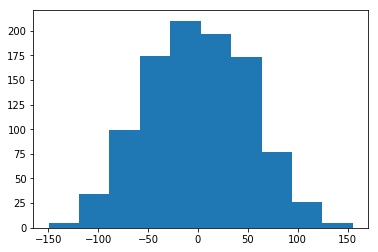

In [52]:
plt.hist(permutation_zero_dist_ind(price2001, price2002, max_combinations = 1000))
plt.show()

In [53]:
def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample, mean)
    
    zero_distr = permutation_zero_dist_ind(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [55]:
print("p-value: %f" % permutation_test(price2001, price2002, max_permutations = 50000))

p-value: 0.444400
